Default Of Credict Card Client: Machine Learning Project

Seeniya George

Entri Elevate

 Problem Statement Financial institutions face challenges in managing credit risk due to client defaults. Using the Default of Credit Card Clients Dataset, the goal is to build a machine learning model to:

    Predict the likelihood of a client defaulting on their credit card payments.
    Provide actionable insights to improve lending decisions and risk-based pricing

Objective The project aims to:

    Develop a classification model to predict whether a client will default.
    Use model predictions to categorize clients into low, medium, and high-risk groups.
    Interpret feature importance to derive actionable business insights.

 Dataset Overview

 Data Source

The **Default of Credit Card Clients Dataset** contains:

- 30,000 records of credit card clients.
- Features include demographic, financial, and behavioral attributes (e.g., age, credit limit, payment history).
- Target variable: `default payment next month` (1 = default, 0 = no default).


    Limit Balance: The limit balance of the amount of credit given in dollars

    Sex : gender (1=male, 2=female)

    Education_Level : education level/Education level (1 = Masters, 2 = University,
3 = High School, 4 = other, 5 = unknown, 6 = unknown)

    Marital_Status : Marital status (1 = married, 2 = single, 3 = others)

    Age : age or age in years

    pay_0 : Payment status in September 2005 (-2 = no consumption, -1 = pay fairly,
0 = use of revolving credit, 1 = late payment for one month, 2 = late payment for two months,
… 8 = late payment for eight months, -9 = late payments for nine months and over)

    pay_2 : Payment status in August 2005 
    pay_3 : Payment status in July 2005 
    pay_4 : Payment status in June 2005 
    pay_5 : Payment status in May 2005 
    pay_6 : Payment status in April 2005 

    bill_amt_1 : Total bill for September 2005 
    bill_amt_2 : Total bill for August 2005 
    bill_amt_3 : Total bill for July 2005 
    bill_amt_4 : Total bill for June 2005 
    bill_amt_5 : Total bill for May 2005 
    bill_amt_6 : Total bill for April 2005 

    pay_amt_1 : Amount of previous payment in September 2005 
    pay_amt_2 : Amount of previous payment in August 2005 
    pay_amt_3 : Amount of previous payment in July 2005 
    pay_amt_4 : Amount of previous payment in June 2005 
    pay_amt_5: Amount of previous payment in May 2005 
    pay_amt_6: Amount of previous payment in April 2005 

    default_payment_next_month: default payment next month (1=yes, 0=no)

It is hoped that it will produce an analysis that can provide information from the credit card system for the consideration of users in using credit card services. Or as an evaluation of credit card service providers.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif, chi2
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split, cross_val_score 


from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score, 
                            roc_auc_score, roc_curve, classification_report,
                             confusion_matrix)
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVR
from sklearn.impute import SimpleImputer

from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score, roc_curve, auc
from scipy.stats import uniform
from sklearn.pipeline import Pipeline
import joblib
import warnings
warnings.filterwarnings('ignore')

In [2]:
print("Loading default of credict card client...")
data=pd.read_csv('credit_customer.csv')
data.head(10)

Loading default of credict card client...


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
5,6,50000,1,1,2,37,0,0,0,0,...,19394,19619,20024,2500,1815,657,1000,1000,800,0
6,7,500000,1,1,2,29,0,0,0,0,...,542653,483003,473944,55000,40000,38000,20239,13750,13770,0
7,8,100000,2,2,2,23,0,-1,-1,0,...,221,-159,567,380,601,0,581,1687,1542,0
8,9,140000,2,3,1,28,0,0,2,0,...,12211,11793,3719,3329,0,432,1000,1000,1000,0
9,10,20000,1,3,2,35,-2,-2,-2,-2,...,0,13007,13912,0,0,0,13007,1122,0,0


In [3]:
df=pd.DataFrame(data)

In [11]:
df.shape

(30000, 25)

In [12]:
#Basic Data Analysis

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [6]:
df.duplicated().sum()

0

In [7]:
df.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

In [8]:
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [5]:
# 3. Exploratory Data Analysis
print("\nPerforming Exploratory Data Analysis...")


Performing Exploratory Data Analysis...


In [17]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [9]:
#removing data columns form dataset
df.drop(columns=['ID'],inplace=True)
print('Dataframe after removing date column permently\n')
df.head()

Dataframe after removing date column permently



,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [10]:
df['AGE'].min()

21

In [11]:
df['AGE'].max()

79

In [26]:
#outliyers
numeric_columns =  df.select_dtypes(include = ['number'])

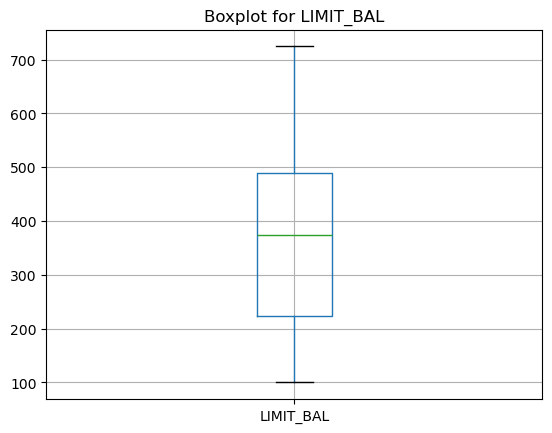

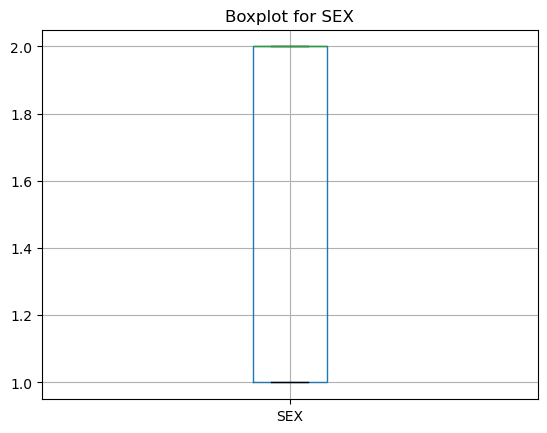

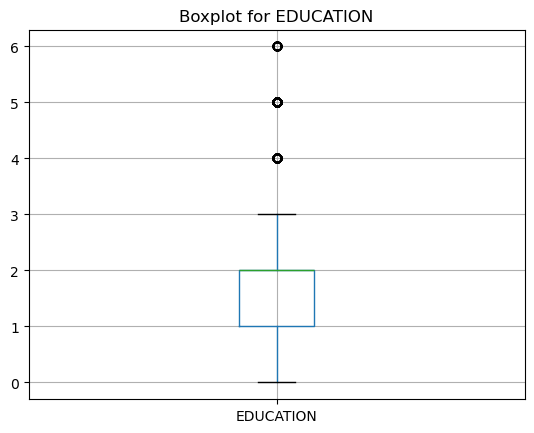

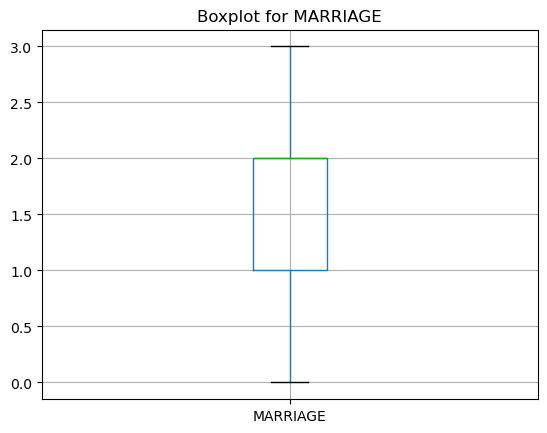

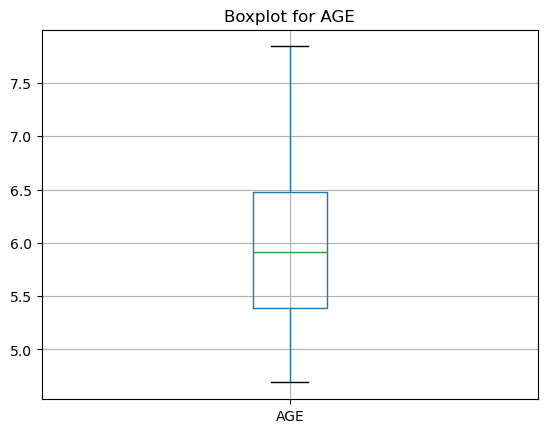

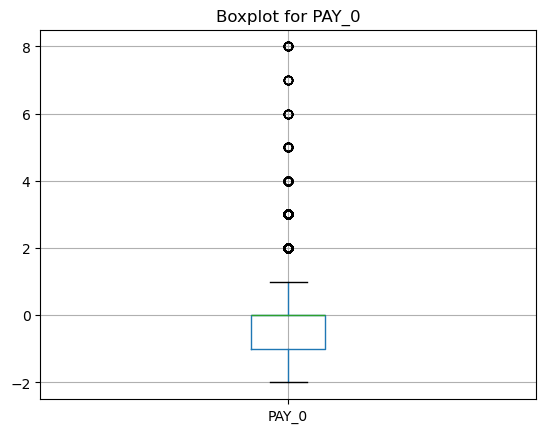

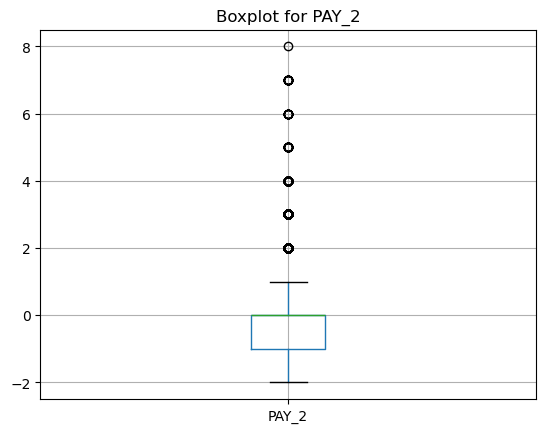

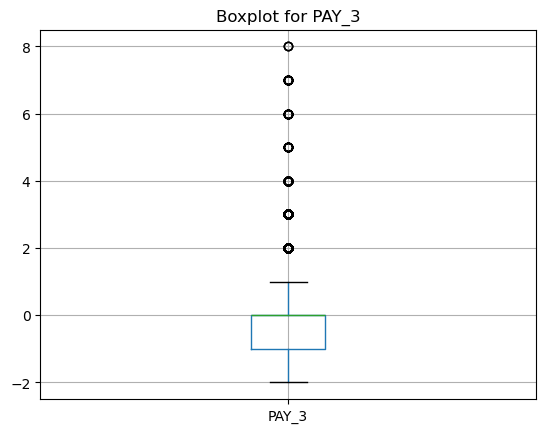

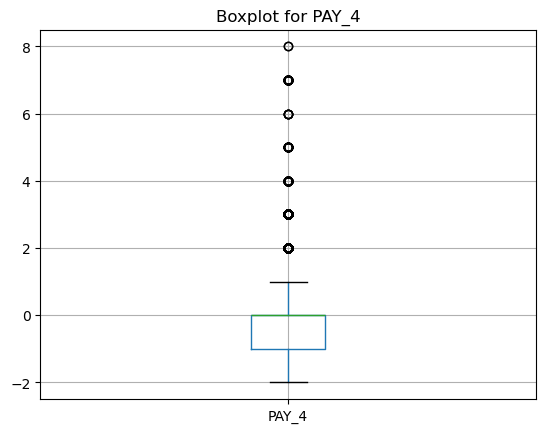

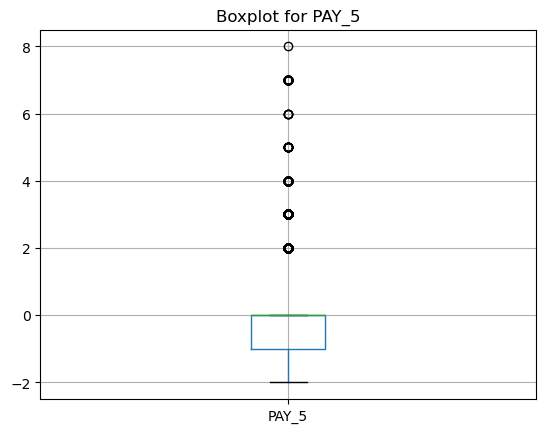

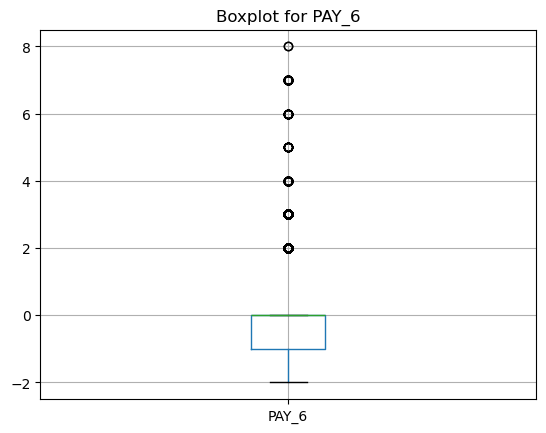

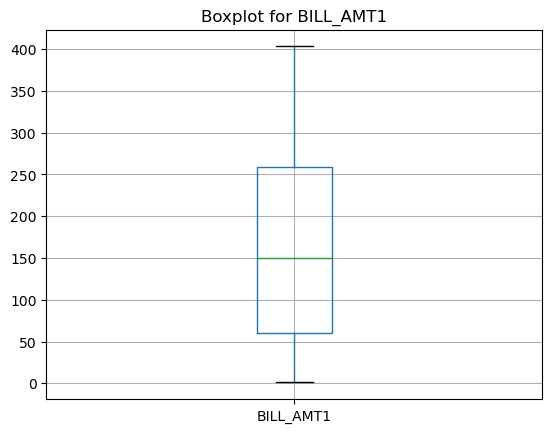

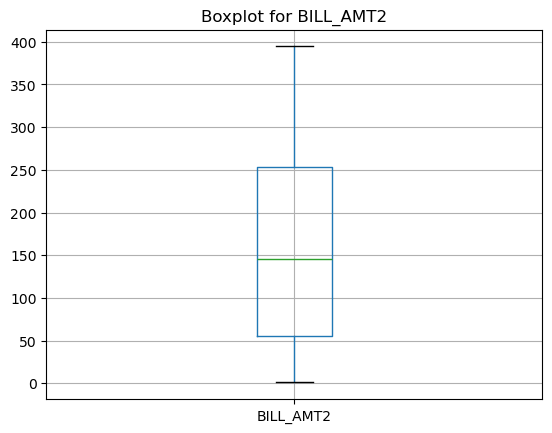

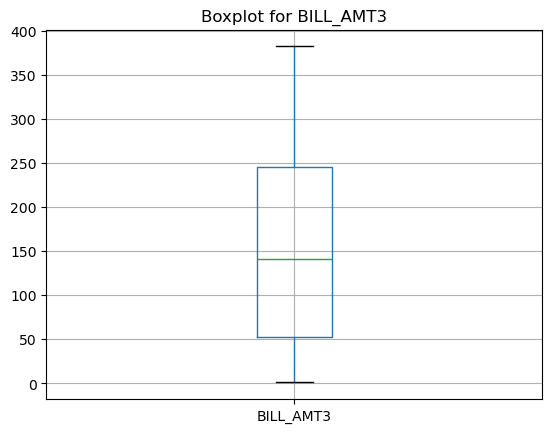

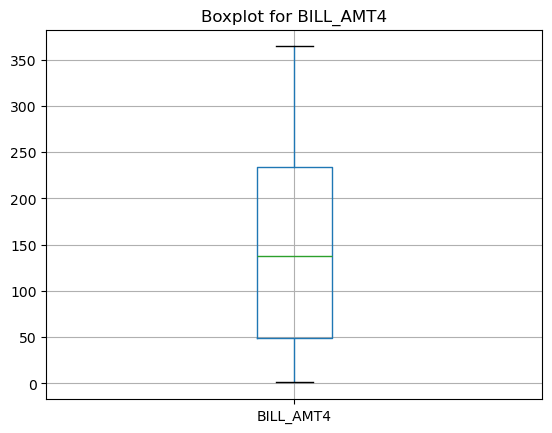

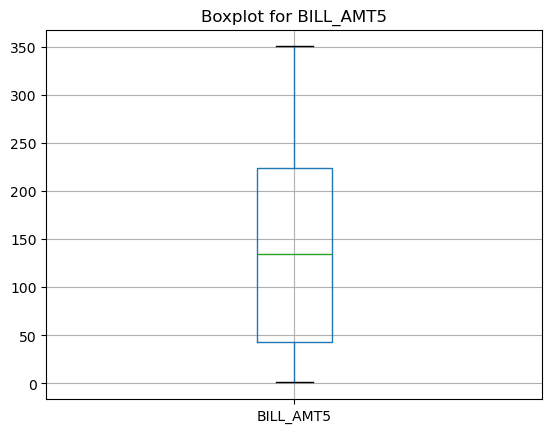

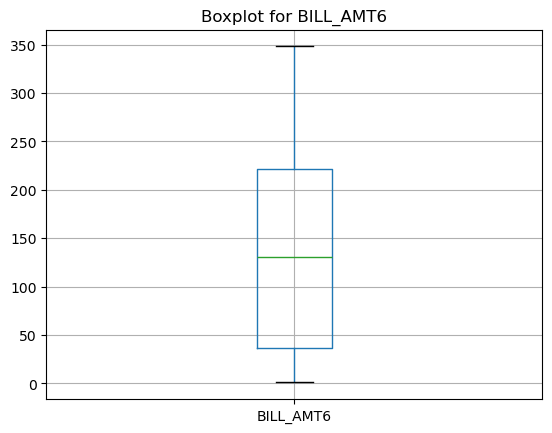

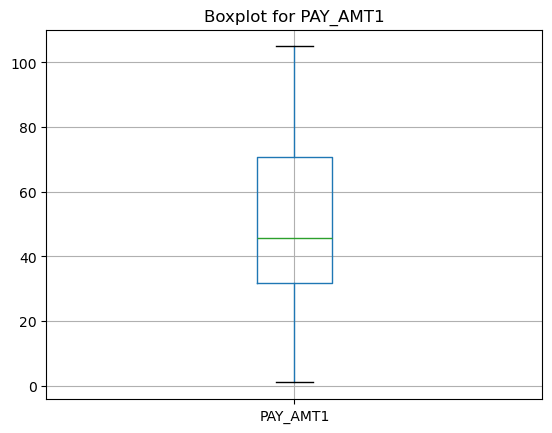

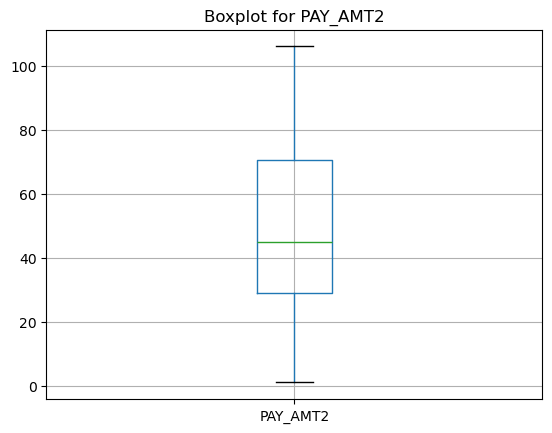

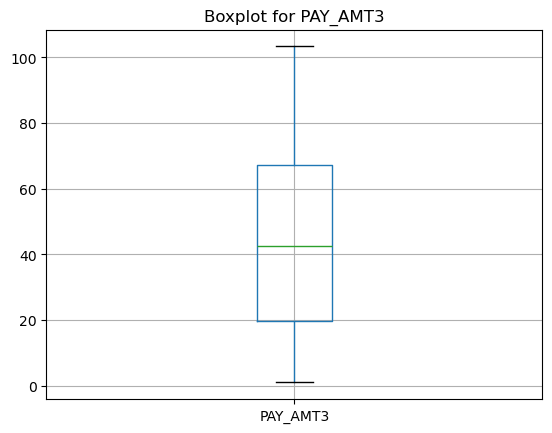

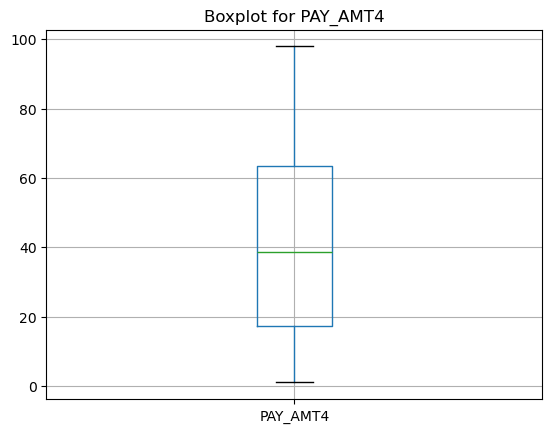

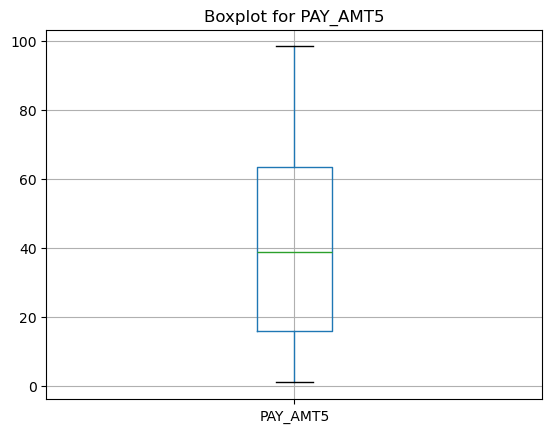

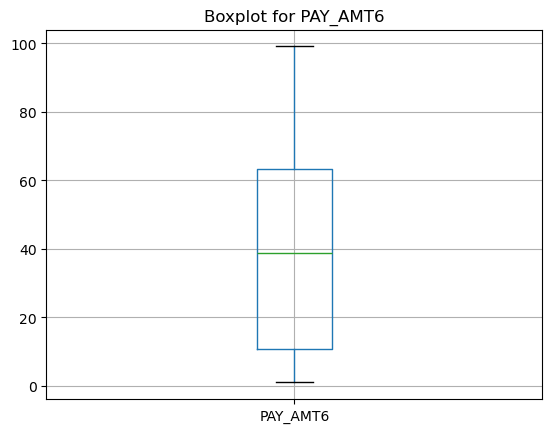

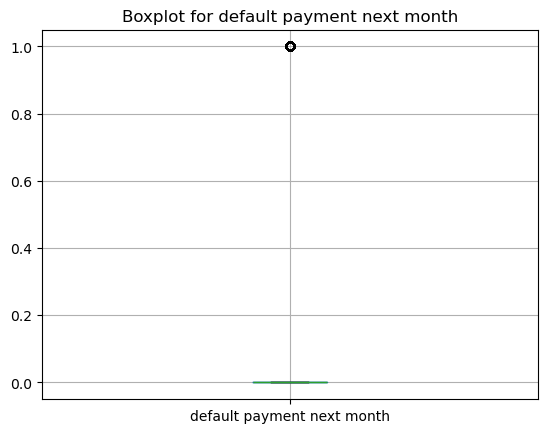

In [27]:
#forloop
for column in numeric_columns.columns:
    plt.figure()
    numeric_columns.boxplot(column=column)
    plt.title(f"Boxplot for {column}")

Outlier Fixing has been handled Using IQR method

In [14]:
outlier_fix_columns = [ 'LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 
    'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 
    'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

In [28]:
# Fix Outliers using the IQR method
for column in outlier_fix_columns:
    Q1 = df[column].quantile(0.25)  # First quartile (25th percentile)
    Q3 = df[column].quantile(0.75)  # Third quartile (75th percentile)
    IQR = Q3 - Q1                   # Interquartile range
    lower_bound = Q1 - 1.5 * IQR    # Lower whisker
    upper_bound = Q3 + 1.5 * IQR    # Upper whisker
    
    # Capping outliers
    df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
    df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])

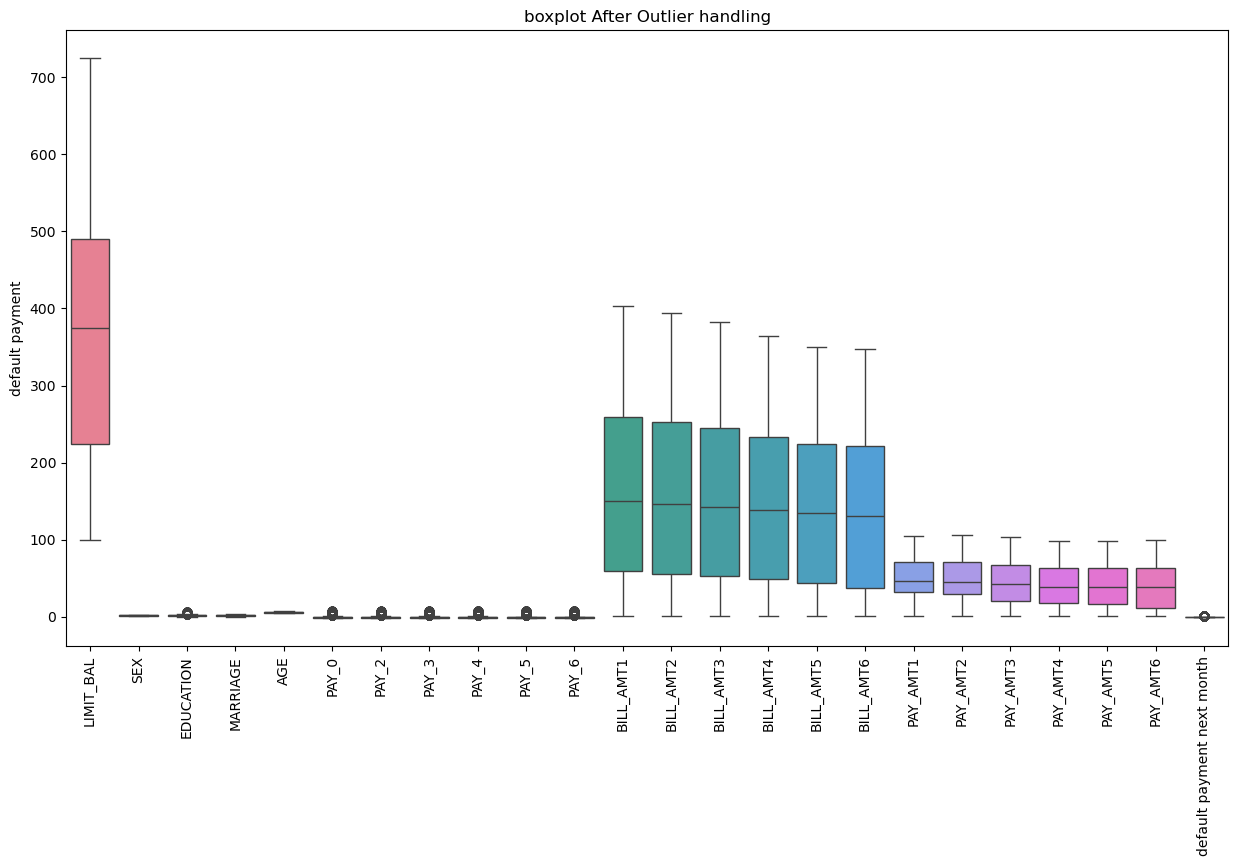

In [29]:
plt.figure(figsize=(15,8))
sns.boxplot(df)
plt.title("boxplot After Outlier handling")
plt.xticks(rotation=90)
plt.ylabel('default payment')
plt.show()

In [30]:
df[outlier_fix_columns].skew()

LIMIT_BAL    0.247482
AGE          0.436065
BILL_AMT1    0.437944
BILL_AMT2    0.422110
BILL_AMT3    0.415432
BILL_AMT4    0.418846
BILL_AMT5    0.427006
BILL_AMT6    0.448018
PAY_AMT1     0.095435
PAY_AMT2     0.163805
PAY_AMT3     0.285515
PAY_AMT4     0.313511
PAY_AMT5     0.308738
PAY_AMT6     0.332968
dtype: float64

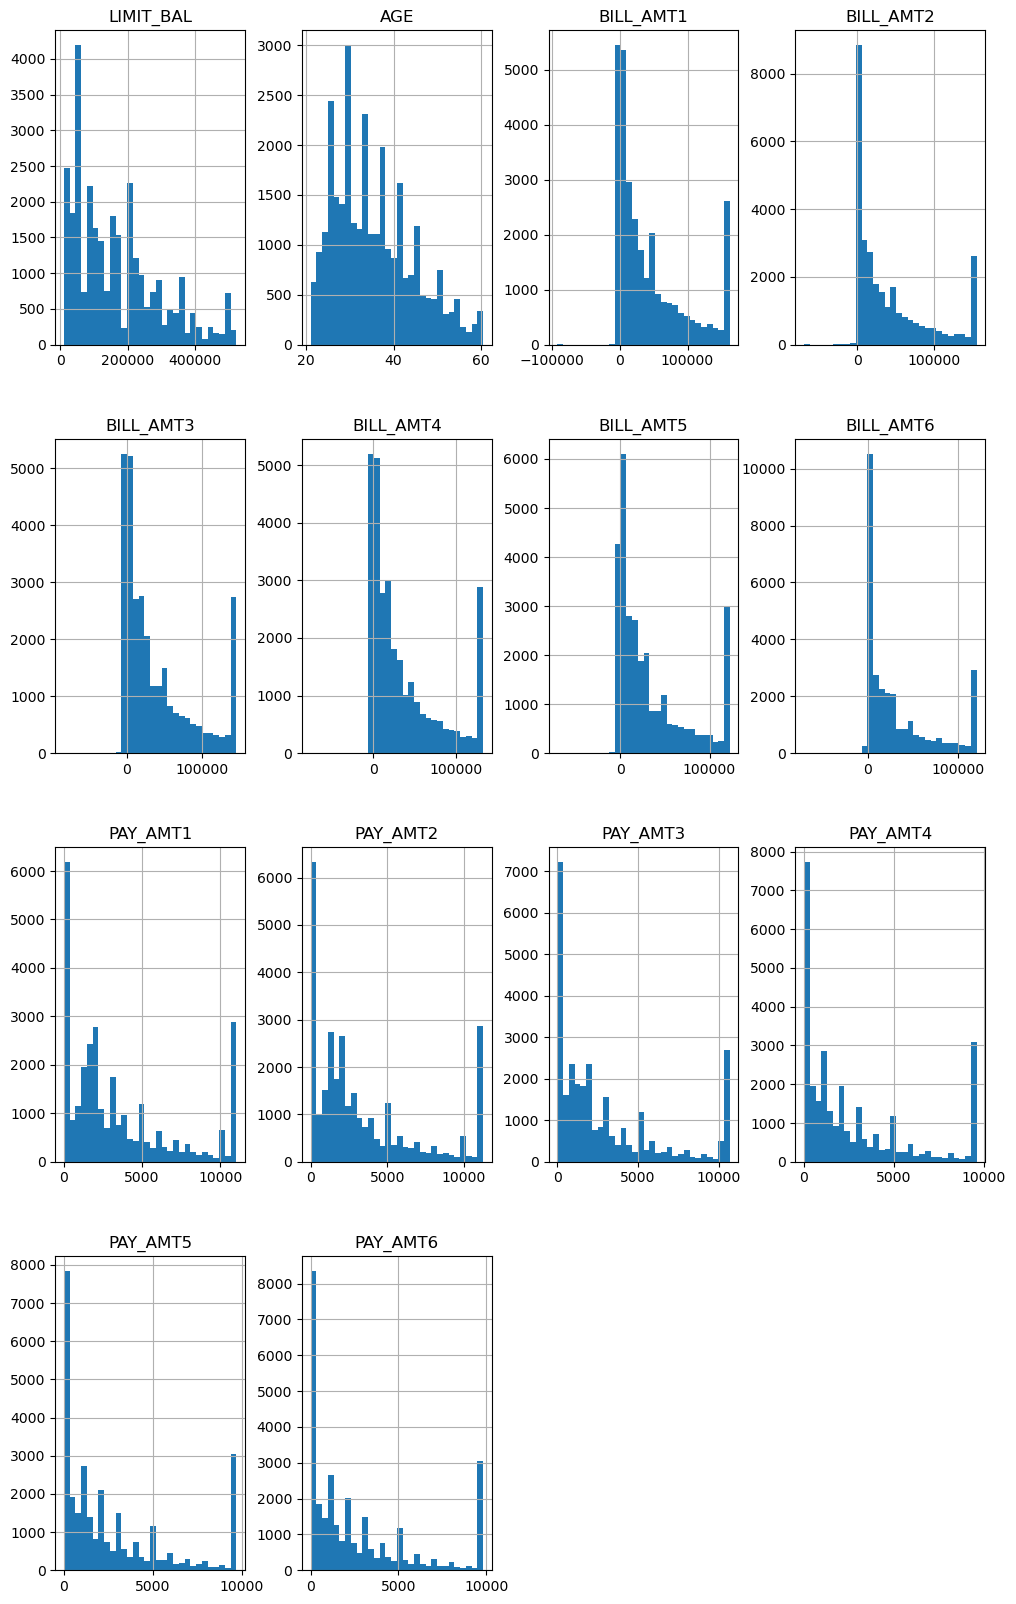

In [27]:
# Plot histograms before transformed features

df[outlier_fix_columns].hist(figsize=(12, 20), bins=30)
plt.show()

In [31]:
# Applying square root transformation to fix skewness of needed features

df[outlier_fix_columns] = np.sqrt(np.abs(df[outlier_fix_columns]) + 1)

In [32]:
print(df[outlier_fix_columns].skew())


LIMIT_BAL   -0.116937
AGE          0.344345
BILL_AMT1   -0.265578
BILL_AMT2   -0.290186
BILL_AMT3   -0.306018
BILL_AMT4   -0.310087
BILL_AMT5   -0.290046
BILL_AMT6   -0.252286
PAY_AMT1    -0.665888
PAY_AMT2    -0.609801
PAY_AMT3    -0.450294
PAY_AMT4    -0.369575
PAY_AMT5    -0.367094
PAY_AMT6    -0.326347
dtype: float64


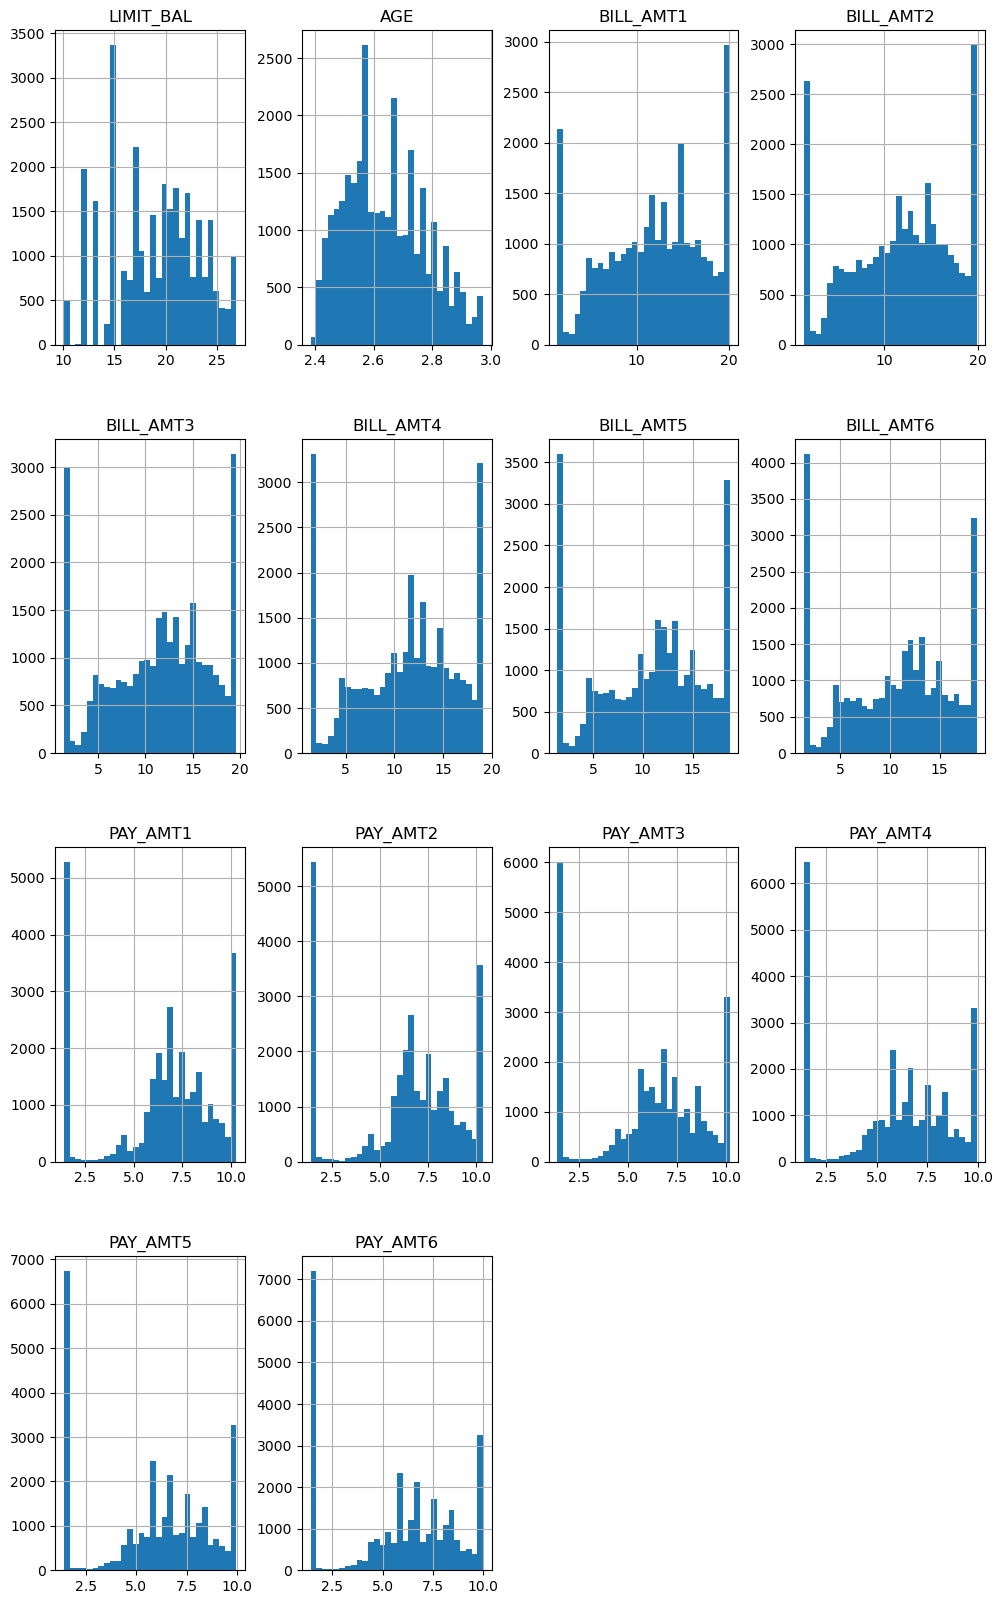

In [34]:
# Plot histograms After transformed features

df[outlier_fix_columns].hist(figsize=(12, 20), bins=30)
plt.show()

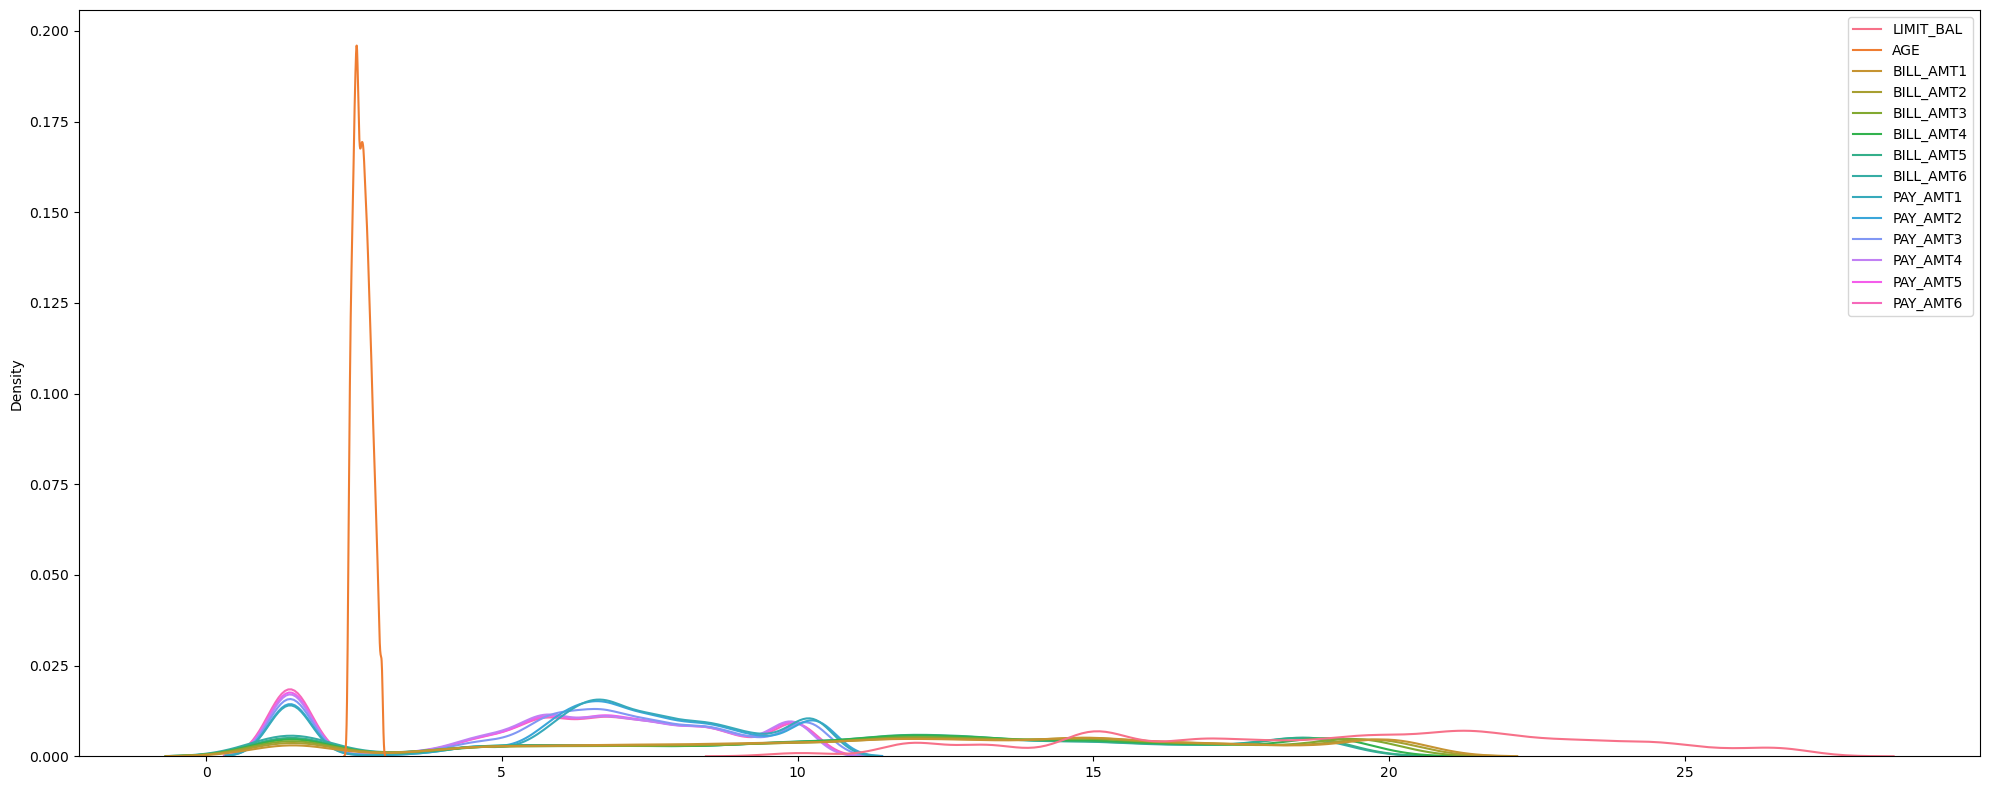

In [35]:
# Drawing KDE plot
plt.figure(figsize=(20,8))
sns.kdeplot(df[outlier_fix_columns])
plt.tight_layout()
plt.show()

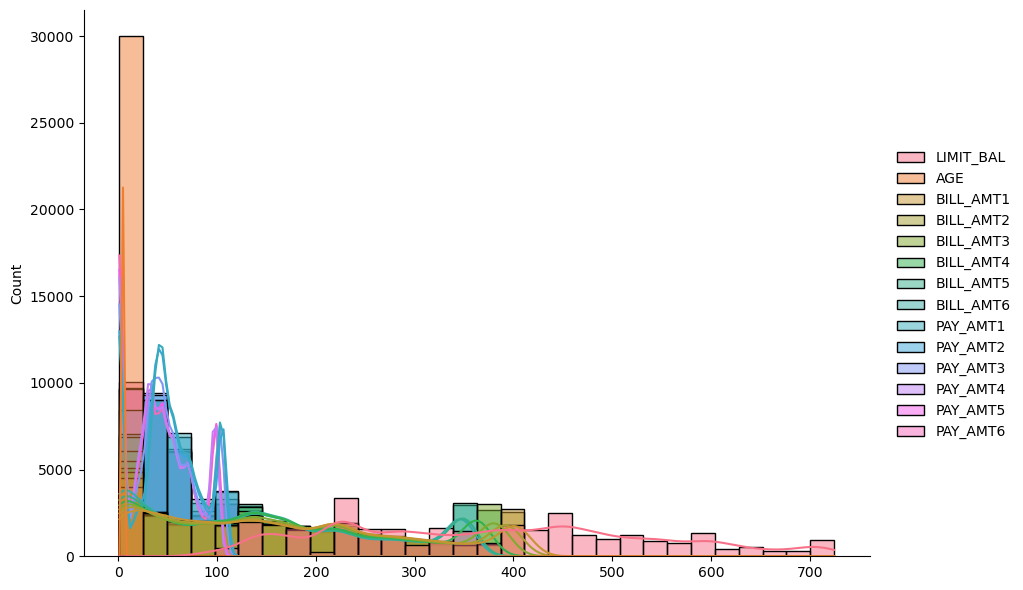

In [32]:
sns.displot(df[outlier_fix_columns], bins=30, kde=True, height=6, aspect=1.5)  # Create the distrib

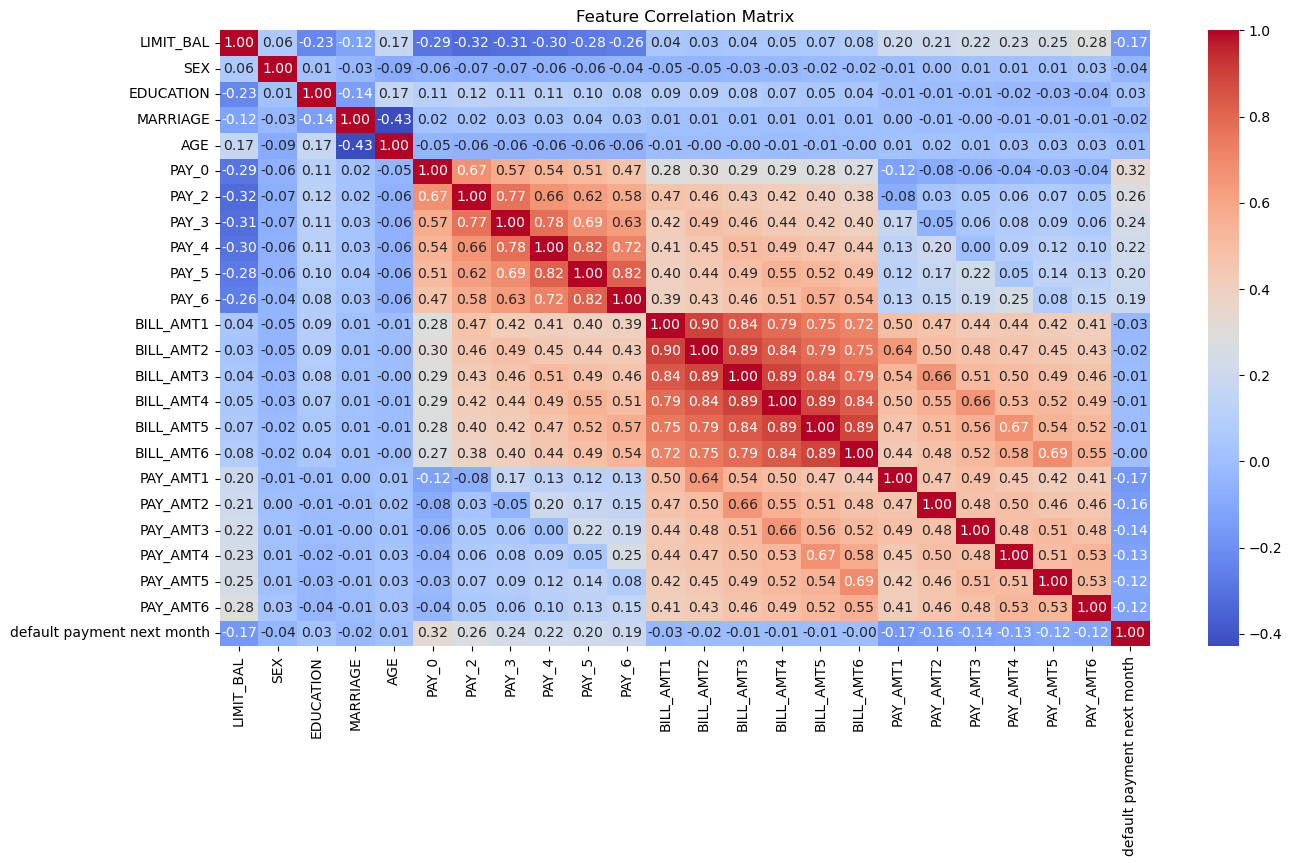

In [36]:
# Compute the correlation matrix
correlation_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(15, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Feature Correlation Matrix')
plt.show()


In [37]:
df['default payment next month'].unique()

array([1, 0], dtype=int64)

In [38]:
print(df['default payment next month'].value_counts())


default payment next month
0    23364
1     6636
Name: count, dtype: int64


In [39]:
df['EDUCATION'].value_counts()

EDUCATION
2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: count, dtype: int64

MARRIAGE: Marital status where 1 is married 2 is single 3 is others and 0 is unknown

In [40]:
df['MARRIAGE'].value_counts()

MARRIAGE
2    15964
1    13659
3      323
0       54
Name: count, dtype: int64

SEX : Gender where 1 represent MALE and 2 represent FEMALE

In [41]:
df['SEX'].value_counts()

SEX
2    18112
1    11888
Name: count, dtype: int64

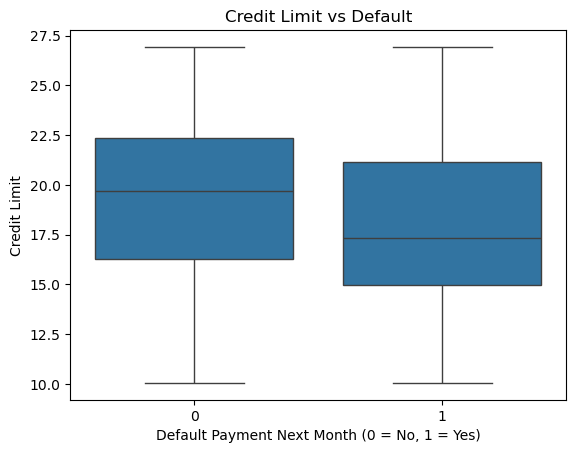

In [67]:
sns.boxplot(x='default payment next month', y='LIMIT_BAL', data=df)
plt.title('Credit Limit vs Default')
plt.xlabel('Default Payment Next Month (0 = No, 1 = Yes)')
plt.ylabel('Credit Limit')
plt.show()

In [42]:
df[['PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']].describe()

,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100
std,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988
min,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000
25%,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000


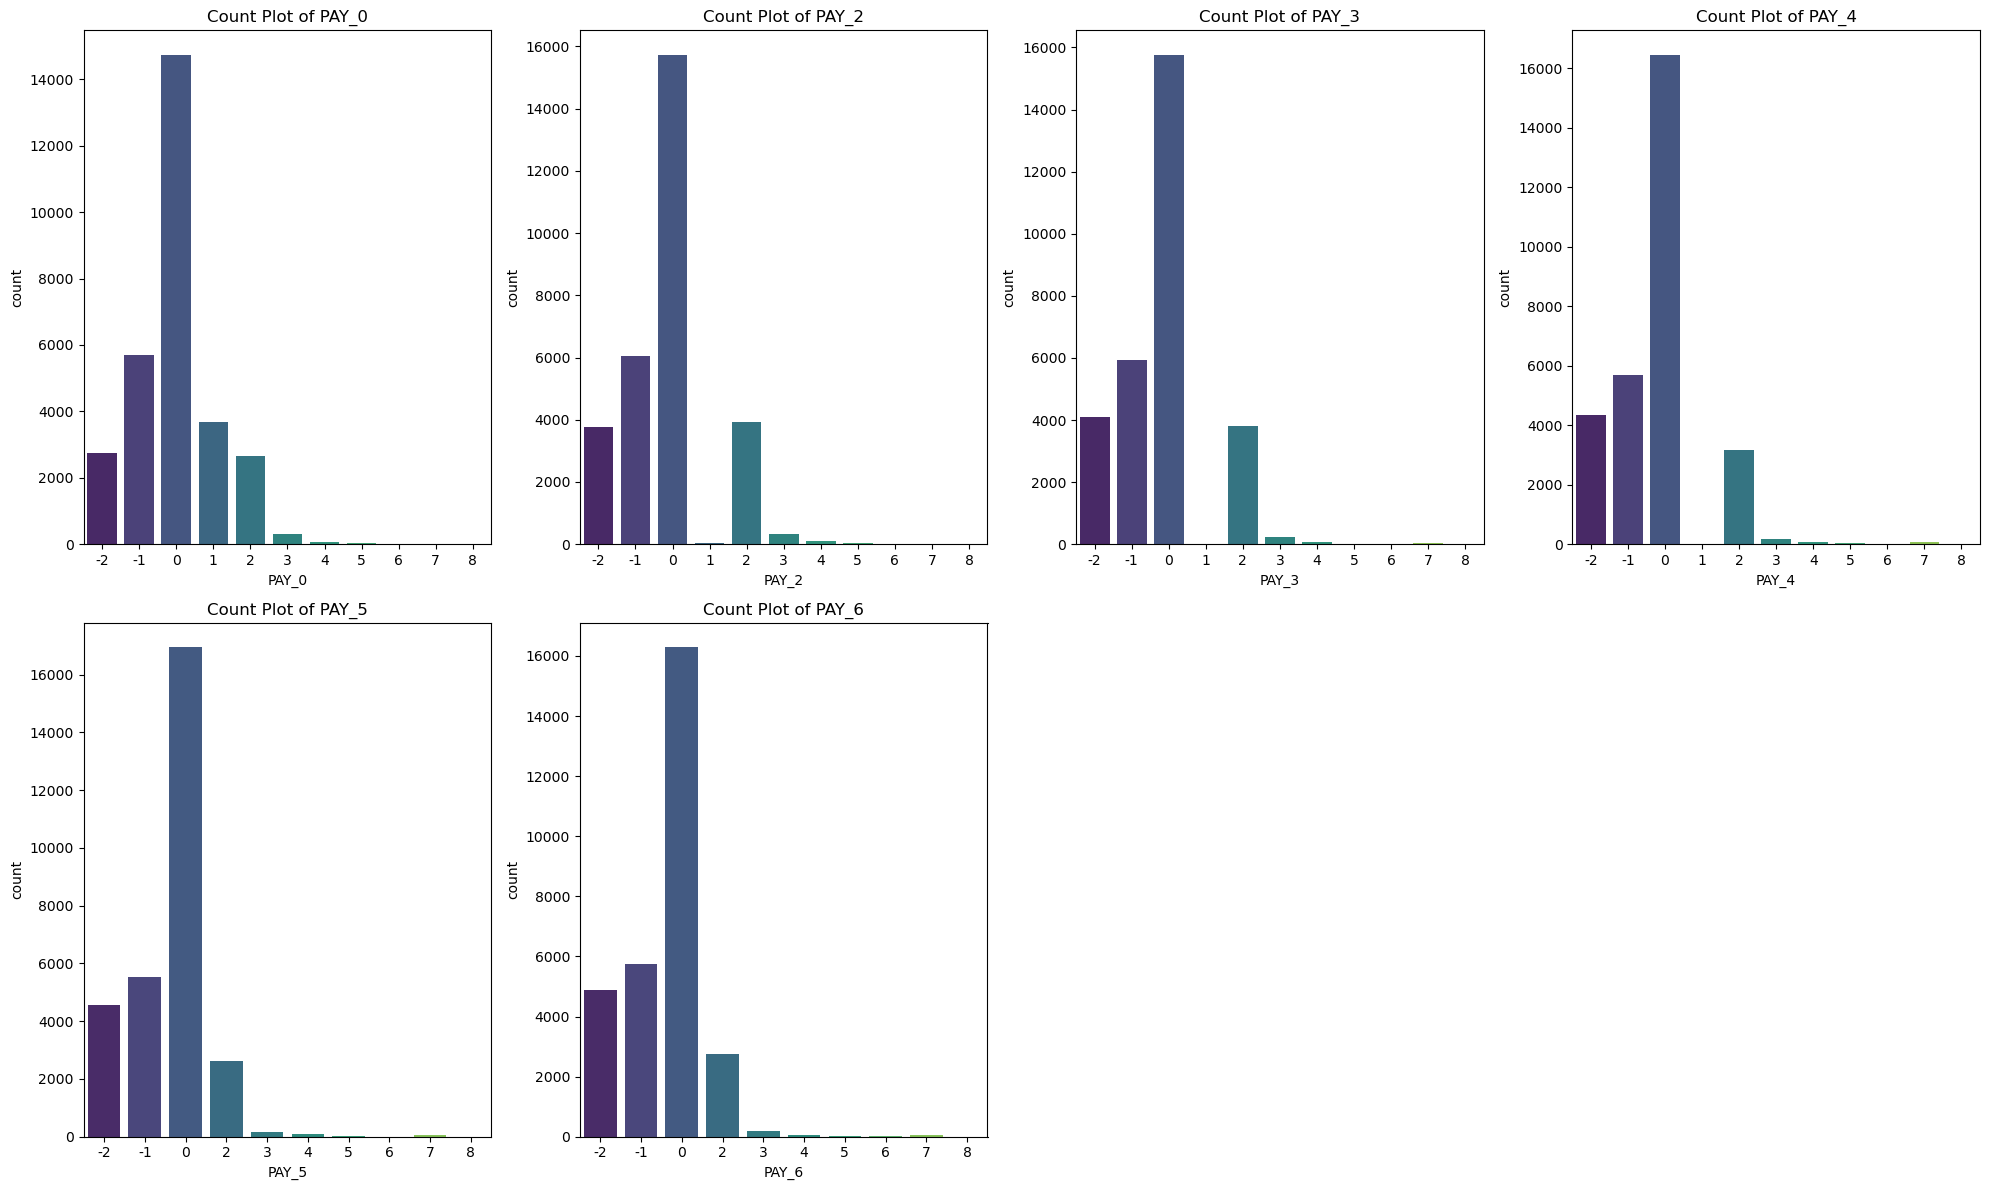

In [118]:
# Count Plot for status of  repayment 

# List of columns to plot
pay_columns = ['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']


# Set the figure size
plt.figure(figsize=(20, 12))

# Loop through each PAY column and create a count plot
for i, column in enumerate(pay_columns):
    plt.subplot(2, 4, i + 1)  # Create a grid of subplots
    sns.countplot(x=df[column], palette="viridis")
    plt.title(f"Count Plot of {column}")

plt.tight_layout()  
plt.show()

In [ ]:
plot shows predetermined values-1 = Fully paid 1- 9 means delayed for 1-9 respectevely -2 = no payment 0 = no due '''

In [43]:
df[['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6']].describe()

,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,11.878923,11.650724,11.444181,11.141469,10.838688,10.593915
std,5.425708,5.504672,5.499243,5.423909,5.401361,5.501314
min,1.414214,1.414214,1.414214,1.414214,1.414214,1.414214
25%,7.807314,7.499962,7.327841,7.071068,6.648099,6.154525
50%,12.272782,12.112546,11.949639,11.793666,11.646390,11.484139
75%,16.127194,15.938276,15.694380,15.315997,15.003217,14.930790
max,20.099176,19.884289,19.586735,19.115027,18.747667,18.681873


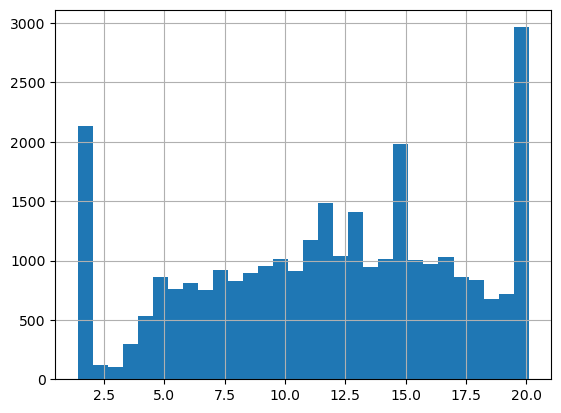

In [44]:
df['BILL_AMT1'].hist(bins=30)
plt.show()

In [45]:
df[['PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']].describe()

,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,6.515482,6.439850,6.122121,5.882055,5.867115,5.797860
std,2.824688,2.840539,2.858810,2.842069,2.871554,2.920546
min,1.414214,1.414214,1.414214,1.414214,1.414214,1.414214
25%,5.713019,5.466174,4.557820,4.270092,4.113593,3.449235
50%,6.843732,6.770009,6.590766,6.304184,6.304184,6.304184
75%,8.471137,8.468633,8.253893,8.022351,8.031312,8.015825
max,10.293548,10.347613,10.214540,9.946315,9.974651,10.005898


In [72]:
# Bill and Payment Columns
bill_columns = ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']
pay_columns = ['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']


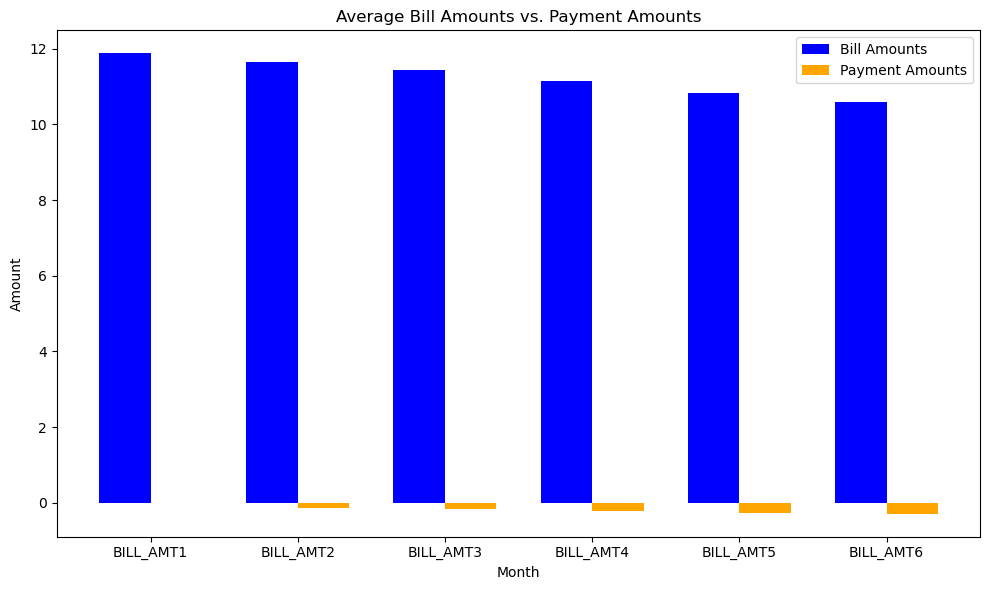

In [121]:


# Set the positions for the bars on the x-axis
x = np.arange(len(bill_columns))  # This creates an array from 0 to the number of columns (6 in this case)

# Define the width of the bars
width = 0.35  # Adjust to get enough space between bars

# Create the plot
plt.figure(figsize=(10, 6))

# Plot the bill amounts as bars
plt.bar(x - width/2, df[bill_columns].mean(), width, label='Bill Amounts', color='blue')

# Plot the payment amounts as bars
plt.bar(x + width/2, df[pay_columns].mean(), width, label='Payment Amounts', color='orange')

# Add labels and title
plt.xlabel('Month')
plt.ylabel('Amount')
plt.title('Average Bill Amounts vs. Payment Amounts')
plt.xticks(x, ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6'])
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

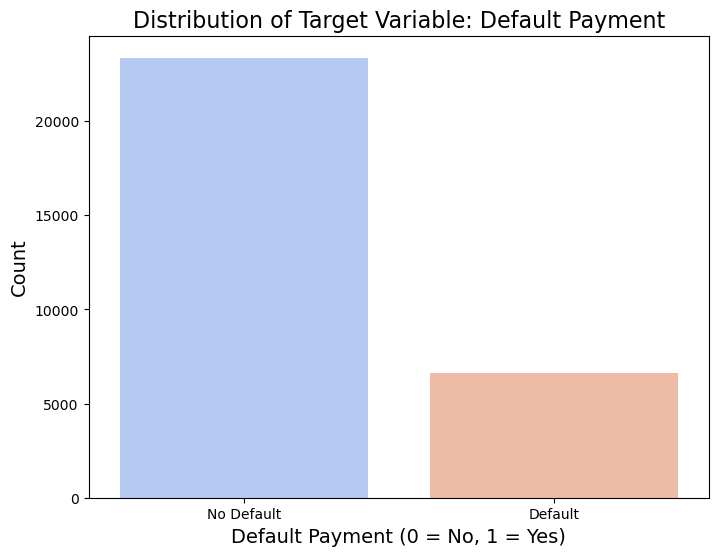

In [47]:
 #Plot distribution of the target variable
plt.figure(figsize=(8, 6))
sns.countplot(x='default payment next month', data=df, palette='coolwarm')
plt.title("Distribution of Target Variable: Default Payment", fontsize=16)
plt.xlabel("Default Payment (0 = No, 1 = Yes)", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.xticks([0, 1], ["No Default", "Default"])
plt.show()

feature selection

In [76]:
X= [
     'LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 
    'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 
    'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'
]
X = df.drop(columns=['default payment next month'])
y = df['default payment next month']
 

In [50]:
#splitting(train test)

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [78]:
#FRATURE SELECTION USING RAMDOMFOREST
rf = RandomForestClassifier(n_estimators=100,random_state=45,max_depth=5)
rf.fit(X_train,y_train)


RandomForestClassifier(max_depth=5, random_state=45)

In [79]:
 #Get feature importances
importances = rf.feature_importances_

# Create a DataFrame to visualize feature importance
feature_importances = pd.DataFrame({'Feature': X_train.columns, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

print(feature_importances)

               Feature  Importance
5                PAY_0    0.337591
6                PAY_2    0.197062
8                PAY_4    0.078979
7                PAY_3    0.073787
9                PAY_5    0.058802
25  payment_percentage    0.049572
24    total_pay_amount    0.045885
10               PAY_6    0.029326
17            PAY_AMT1    0.021131
19            PAY_AMT3    0.013569
0            LIMIT_BAL    0.012495
18            PAY_AMT2    0.012126
23   total_bill_amount    0.011892
11           BILL_AMT1    0.009556
20            PAY_AMT4    0.007487
12           BILL_AMT2    0.007375
22            PAY_AMT6    0.006135
15           BILL_AMT5    0.004549
13           BILL_AMT3    0.004397
16           BILL_AMT6    0.004177
14           BILL_AMT4    0.004024
21            PAY_AMT5    0.003781
4                  AGE    0.002995
2            EDUCATION    0.001700
3             MARRIAGE    0.000962
1                  SEX    0.000644


In [80]:
# Select top 10 features
top_n_features = feature_importances.head(12)
print(f"Top 10 features: {top_n_features}")

Top 10 features:                Feature  Importance
5                PAY_0    0.337591
6                PAY_2    0.197062
8                PAY_4    0.078979
7                PAY_3    0.073787
9                PAY_5    0.058802
25  payment_percentage    0.049572
24    total_pay_amount    0.045885
10               PAY_6    0.029326
17            PAY_AMT1    0.021131
19            PAY_AMT3    0.013569
0            LIMIT_BAL    0.012495
18            PAY_AMT2    0.012126


In [81]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [82]:

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

MODEL BUILDING



In [83]:
# Models to compare
models = {
    'Logistic Regression': LogisticRegression(max_iter=10000, random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVM': SVC(probability=True, random_state=42),
    'K-NN': KNeighborsClassifier(),
    'GradientBoostingClassifier' :GradientBoostingClassifier(random_state=42),
    
}


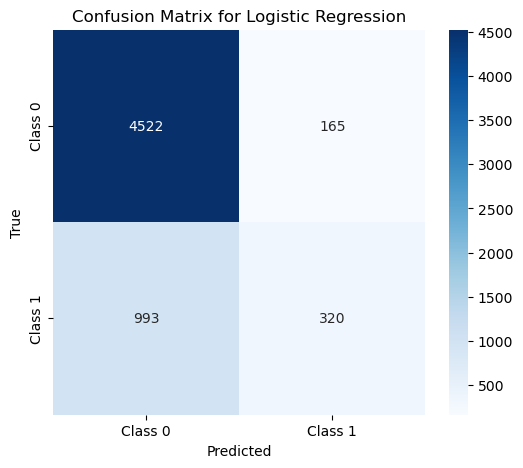

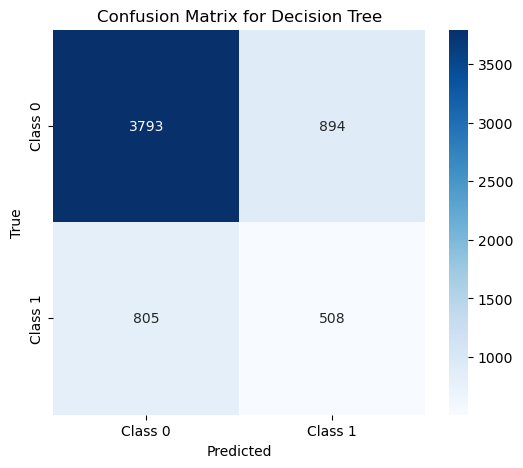

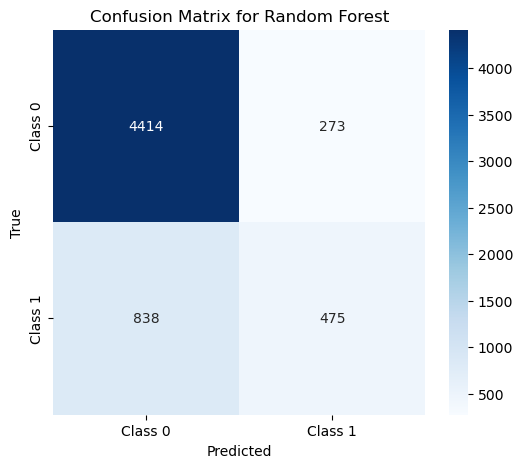

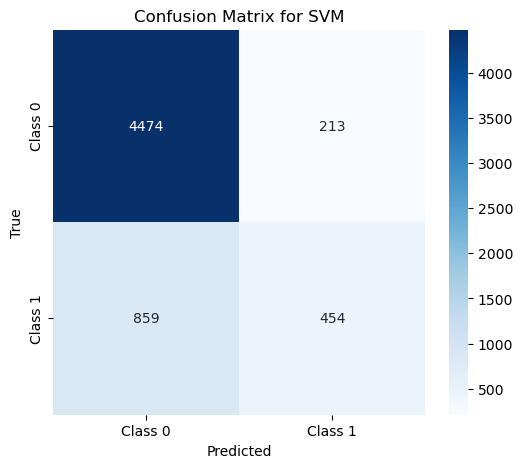

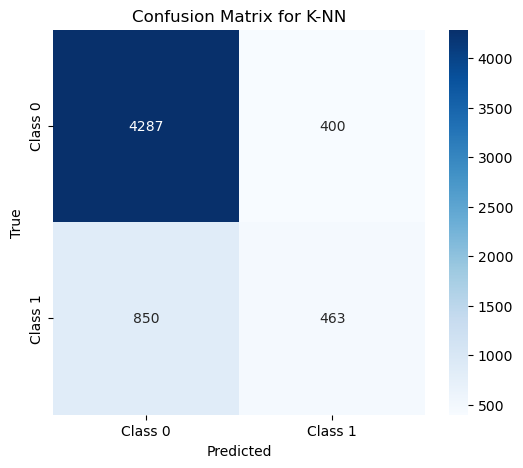

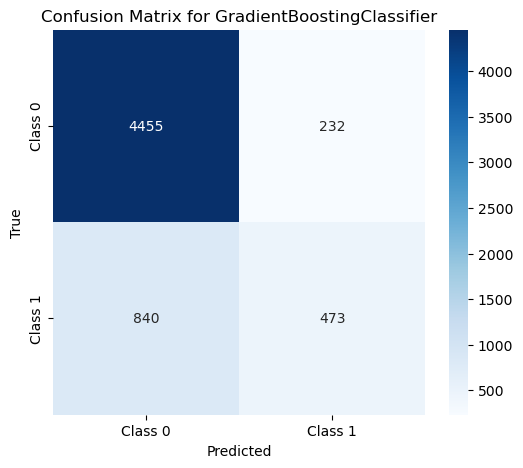


Logistic Regression:
Accuracy: 0.8070
Confusion Matrix:
[[4522  165]
 [ 993  320]]
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.96      0.89      4687
           1       0.66      0.24      0.36      1313

    accuracy                           0.81      6000
   macro avg       0.74      0.60      0.62      6000
weighted avg       0.78      0.81      0.77      6000


Decision Tree:
Accuracy: 0.7168
Confusion Matrix:
[[3793  894]
 [ 805  508]]
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.81      0.82      4687
           1       0.36      0.39      0.37      1313

    accuracy                           0.72      6000
   macro avg       0.59      0.60      0.60      6000
weighted avg       0.72      0.72      0.72      6000


Random Forest:
Accuracy: 0.8148
Confusion Matrix:
[[4414  273]
 [ 838  475]]
Classification Report:
              precision    recall  f1

In [58]:
results = {}

# Train, evaluate, and store results for each model
for model_name, model in models.items():
    # Training the model
    model.fit(X_train_scaled, y_train)
    
    # Making predictions
    y_pred = model.predict(X_test_scaled)

   
    
    # Accuracy Score
    accuracy = accuracy_score(y_test, y_pred)
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # Classification Report
    cr = classification_report(y_test, y_pred)
    
    # Storing results in the dictionary
    results[model_name] = {
        "Accuracy": accuracy,
        "Confusion Matrix": cm,
        "Classification Report": cr
    }

    
     # Plotting the confusion matrix as a heatmap
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
    plt.title(f"Confusion Matrix for {model_name}")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()

# Printing results
for model_name, metrics in results.items():
    print(f"\n{model_name}:")
    print(f"Accuracy: {metrics['Accuracy']:.4f}")
    print(f"Confusion Matrix:\n{metrics['Confusion Matrix']}")
    print(f"Classification Report:\n{metrics['Classification Report']}")

In [55]:
# Print results
print("Model Performance:")
for name, metrics in results.items():
    print(f"{name}: Accuracy = {metrics['Accuracy']:.4f}")

Model Performance:
Logistic Regression: Accuracy = 0.8070
Decision Tree: Accuracy = 0.7172
Random Forest: Accuracy = 0.8143
SVM: Accuracy = 0.8210
K-NN: Accuracy = 0.7940
GradientBoostingClassifier: Accuracy = 0.8213


In [59]:
best_model_name = max(results, key=lambda model: results[model]['Accuracy'])
best_model_accuracy = results[best_model_name]['Accuracy']

print(f"The best model is {best_model_name} with an accuracy of {best_model_accuracy:.4f}")

The best model is SVM with an accuracy of 0.8213


Hyperperameter Tuning

In [60]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

In [61]:
# Define the model
model = GradientBoostingClassifier(random_state=42)
     

In [62]:
# Define the parameter distribution
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'subsample': [0.8, 1.0]
}


In [63]:
# Perform Grid Search
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

# Best parameters and performance
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Cross-Validation Score: {grid_search.best_score_}")

Fitting 5 folds for each of 486 candidates, totalling 2430 fits
Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100, 'subsample': 0.8}
Best Cross-Validation Score: 0.8223333333333332


In [98]:
print(f"Training data features: {X_train.shape[1]}")  # Number of features in training data
print(f"Test data features: {X_test.shape[1]}")  # Number of features in test data

Training data features: 26
Test data features: 26


Create Pipeline

In [100]:
# 2. Create the pipeline
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),  # Impute missing values
    ('scaler', StandardScaler()),                # Standardize features
    ('model', GradientBoostingClassifier())      # Model
])


In [101]:
# Fit the pipeline with the training data
pipeline.fit(X_train, y_train)

# Make predictions using the test data (it automatically applies the scaling)
y_pred = pipeline.predict(X_test)

# Evaluate the model
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.8212
Confusion Matrix:
[[4456  231]
 [ 842  471]]
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      4687
           1       0.67      0.36      0.47      1313

    accuracy                           0.82      6000
   macro avg       0.76      0.65      0.68      6000
weighted avg       0.80      0.82      0.80      6000



In [106]:
# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

Pipeline(steps=[('imputer', SimpleImputer()), ('scaler', StandardScaler()),
                ('model', GradientBoostingClassifier())])

In [107]:
# Save the fitted pipeline to a file
joblib.dump(pipeline, 'best_model_pipeline_main.pkl')

['best_model_pipeline_main.pkl']

TEST WITH UNSEEN DATA

In [108]:
loaded_pipeline = joblib.load('best_model_pipeline_main.pkl')

In [116]:
df_unseen = pd.read_csv('unseendata.csv')
df_unseen.head(10)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,120000,2,2,1,30,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,0
1,2,20000,2,2,2,20,-1,2,0,0,...,2272,4455,3261,0,2000,1000,1500,0,2500,0
2,3,650000,2,2,2,40,0,0,0,0,...,6500,6500,2870,1000,6500,6500,6500,2870,0,0
3,4,50000,2,2,1,25,0,0,0,0,...,28414,28859,25547,3000,2519,2200,1000,1569,1000,1
4,5,40000,1,2,1,43,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
5,6,60000,1,1,2,67,0,0,0,0,...,19394,19619,20024,2500,1815,657,1000,1000,800,0
6,7,310000,1,1,1,32,0,0,0,0,...,70074,5856,195599,10358,10000,75940,20000,195599,50000,1
7,8,600000,1,1,2,70,0,-1,-1,0,...,542653,483003,473944,55000,40000,38000,20239,13750,13770,0
8,9,550000,2,3,1,50,0,0,2,0,...,445007,473955,56000,36000,40000,39000,21239,13450,15000,0
9,10,200000,2,2,2,65,-2,-2,-2,-2,...,221,-159,567,380,601,0,581,1687,1542,0


Splitting X and Y

In [122]:
X_unseen = df_unseen.drop('default payment next month', axis=1)  # Drop the target column
y_actual = df_unseen['default payment next month']  # The true target labels

In [127]:
X = df[['PAY_0', 'AGE', 'LIMIT_BAL', 'BILL_AMT1', 'BILL_AMT2', 'PAY_AMT1',
        'BILL_AMT3', 'BILL_AMT4', 'PAY_AMT2', 'BILL_AMT6']]

# Split the data into training and testing sets (80% training, 20% testing)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training Features Shape: {X_train.shape}")
print(f"Testing Features Shape: {X_test.shape}")
print(f"Training Target Shape: {y_train.shape}")
print(f"Testing Target Shape: {y_test.shape}")

Training Features Shape: (24000, 10)
Testing Features Shape: (6000, 10)
Training Target Shape: (24000,)
Testing Target Shape: (6000,)


In [128]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

# Display shapes to confirm
print(f"X_train_scaled shape: {X_train_scaled.shape}")
print(f"X_test_scaled shape: {X_test_scaled.shape}")

X_train_scaled shape: (24000, 10)
X_test_scaled shape: (6000, 10)


In [133]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [134]:
# Initialize and train the Random Forest model
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)  # Using 100 trees
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [136]:
# Make predictions
y_pred = rf_model.predict(X_test)


In [137]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.81

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.94      0.88      4687
           1       0.61      0.34      0.44      1313

    accuracy                           0.81      6000
   macro avg       0.72      0.64      0.66      6000
weighted avg       0.79      0.81      0.79      6000

